In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import io

## Read the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sahil-gidwani/ML/main/dataset/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Drop the Columns which are unique for all users

In [3]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().any()
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## BiVariate Analysis



In [5]:
print(df.shape)
df.info()

(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Before performing Bivariate analysis, Lets bring all the features to the same range

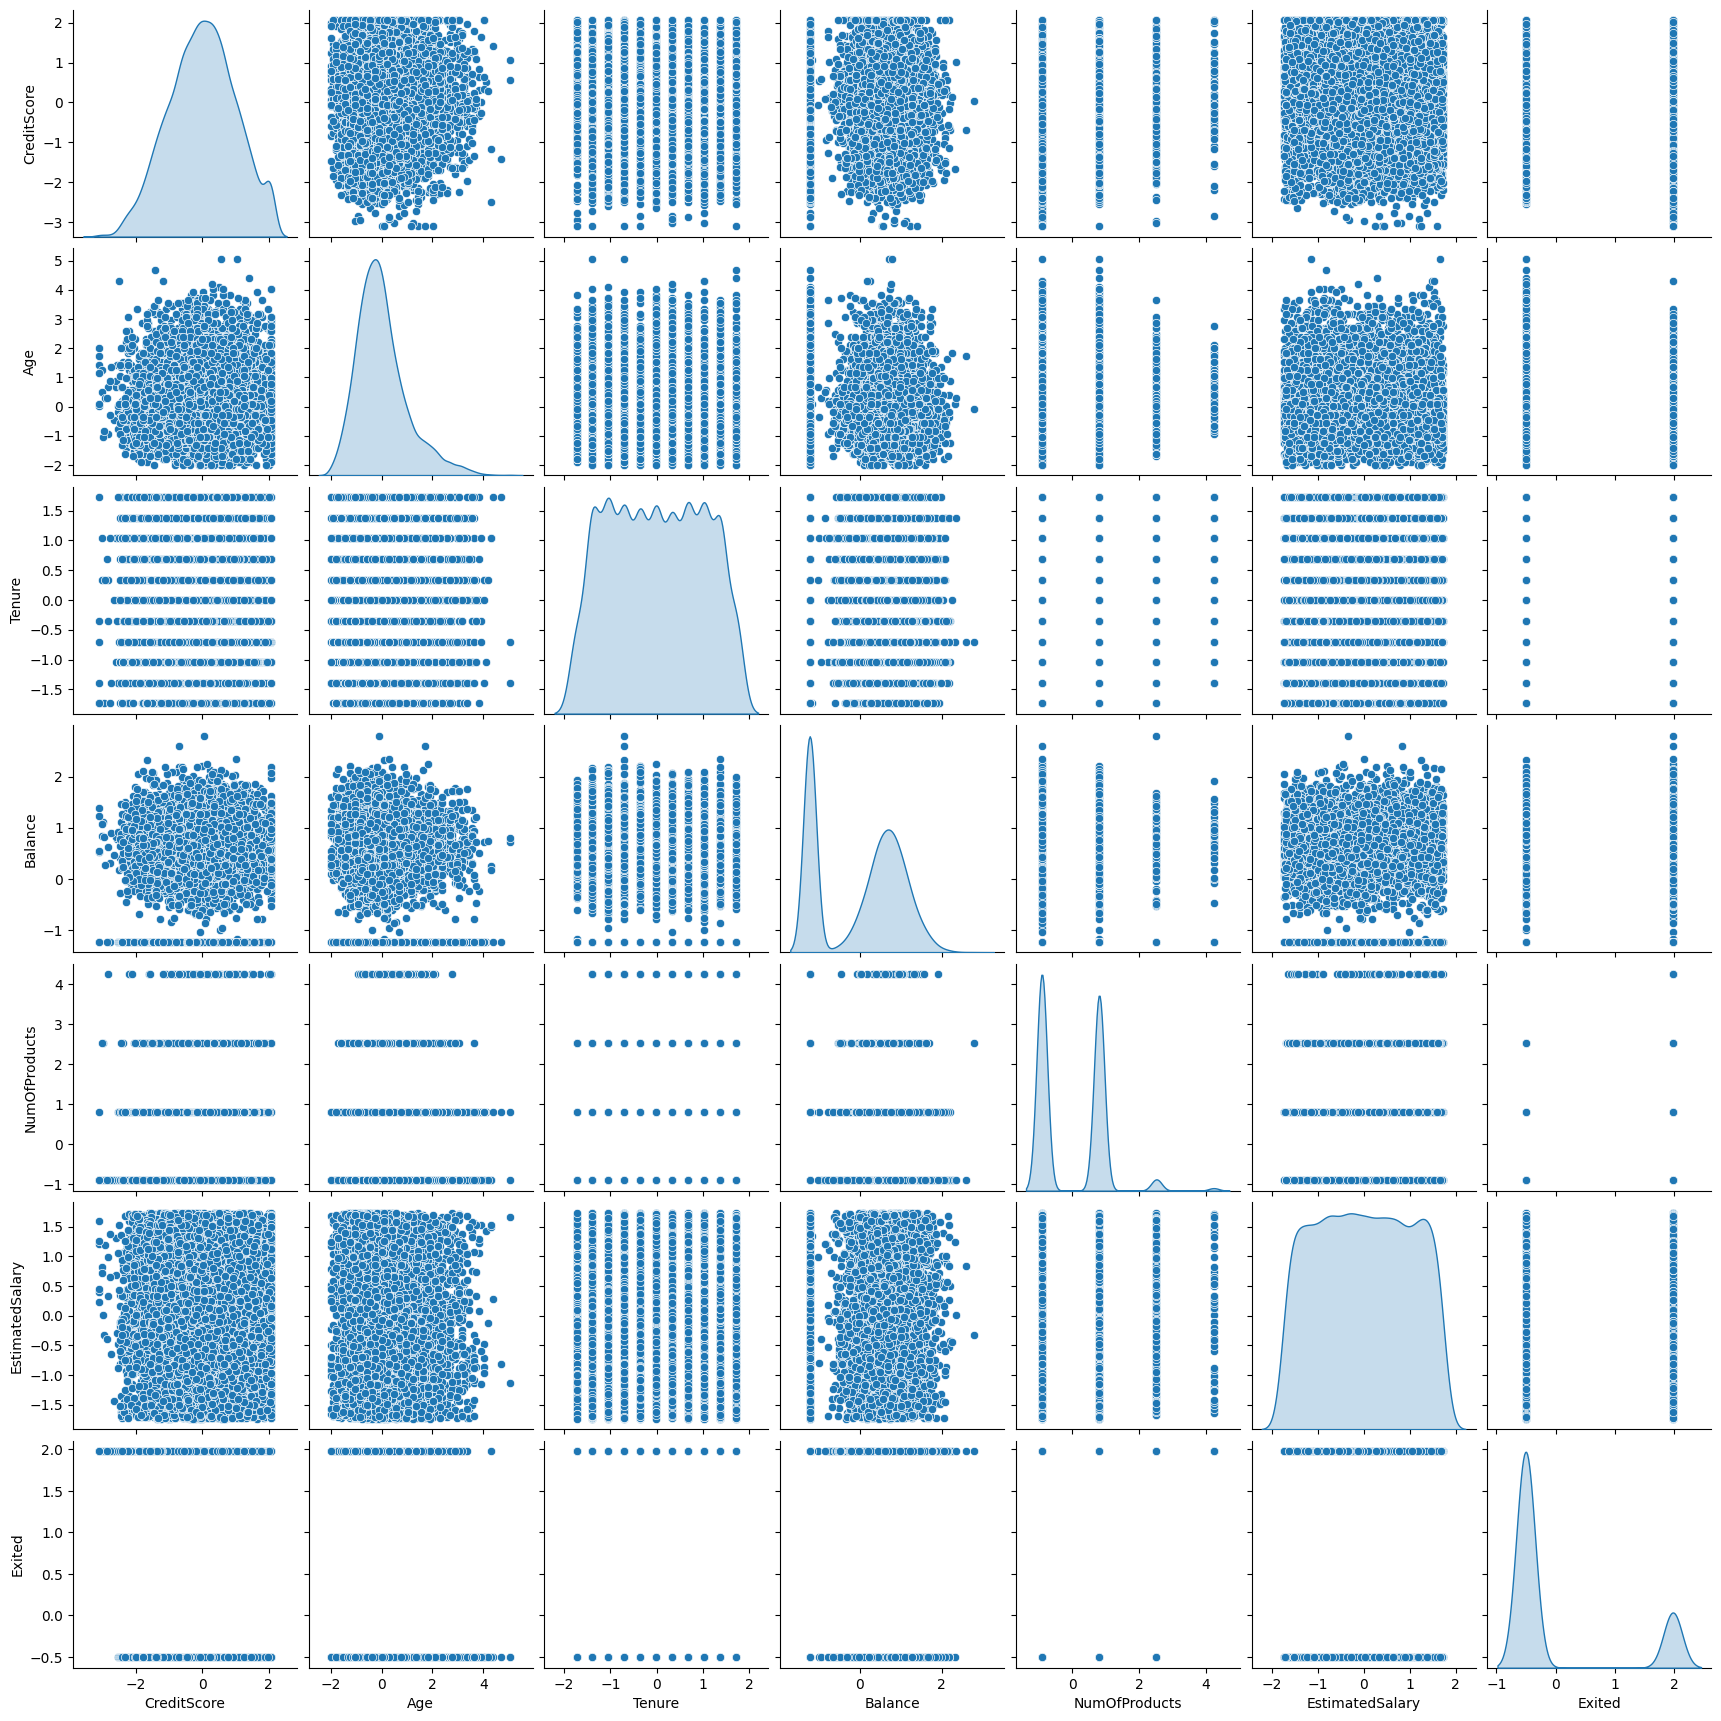

In [7]:
## Scale the data
scaler=StandardScaler()
## Extract only the Numerical Columns to perform Bivariate Analysis
subset=df.drop(['Geography','Gender','HasCrCard','IsActiveMember'],axis=1)
scaled=scaler.fit_transform(subset)
scaled_df=pd.DataFrame(scaled,columns=subset.columns)
sns.pairplot(scaled_df,diag_kind='kde')


<Axes: >

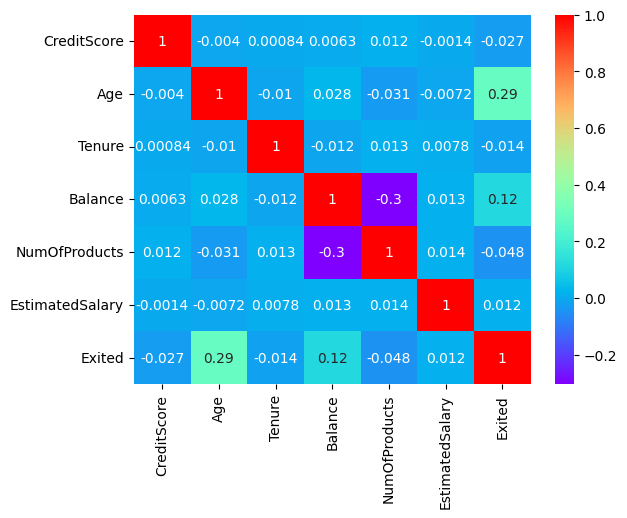

In [8]:
sns.heatmap(scaled_df.corr(),annot=True,cmap='rainbow')

### From the above plots, We can see that there is no significant Linear relationship between the features

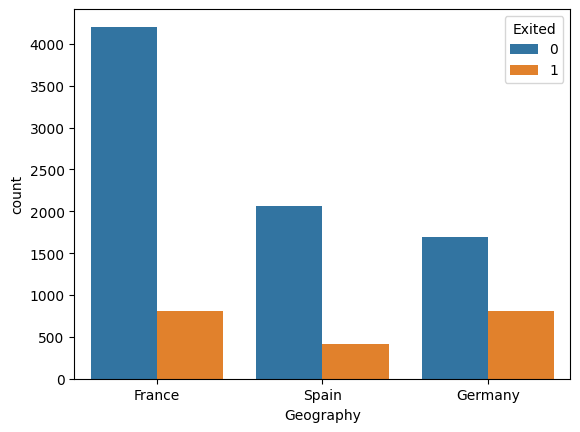

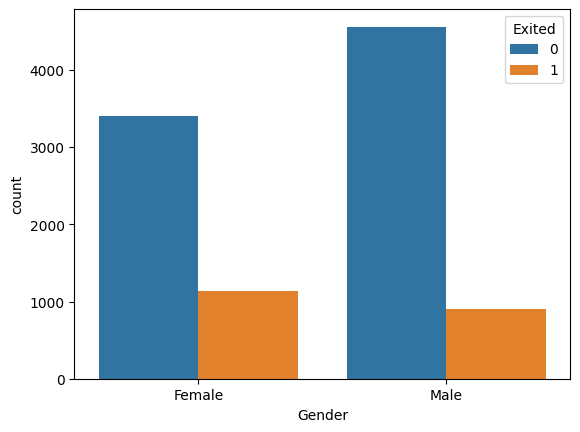

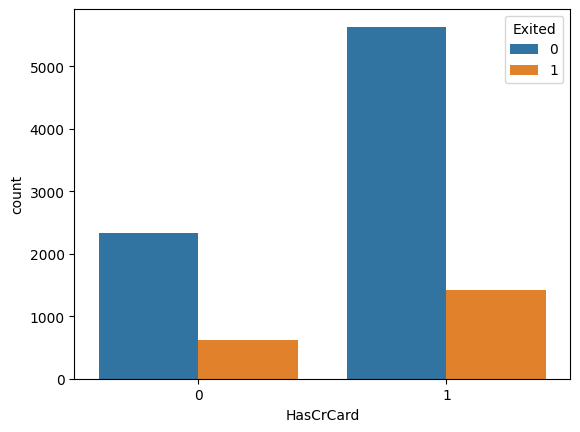

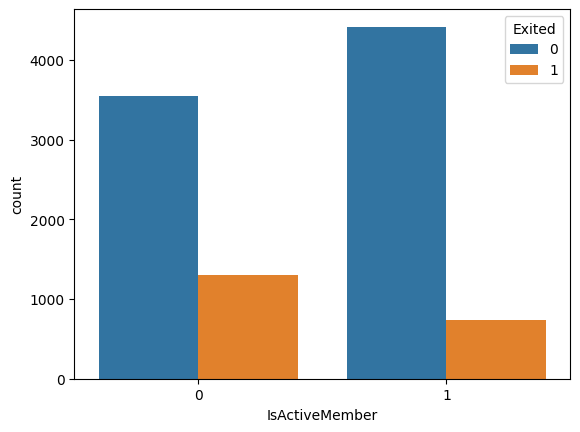

In [9]:
## Categorical Features vs Target Variable
sns.countplot(x='Geography',data=df,hue='Exited')
plt.show()
sns.countplot(x='Gender',data=df,hue='Exited')
plt.show()
sns.countplot(x='HasCrCard',data=df,hue='Exited')
plt.show()
sns.countplot(x='IsActiveMember',data=df,hue='Exited')
plt.show()

### Analysing the Numerical Features relationship with the Target variable. Here 'Exited' is the Target Feature.

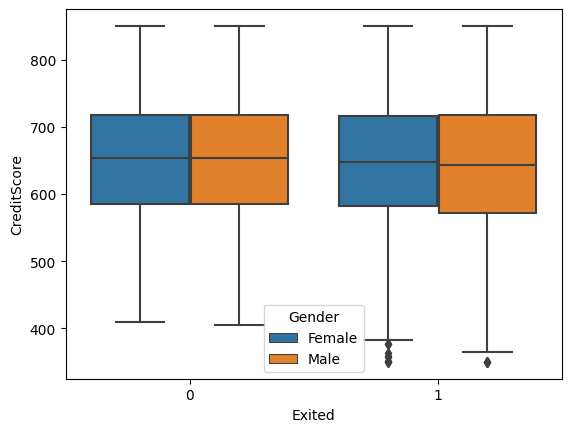

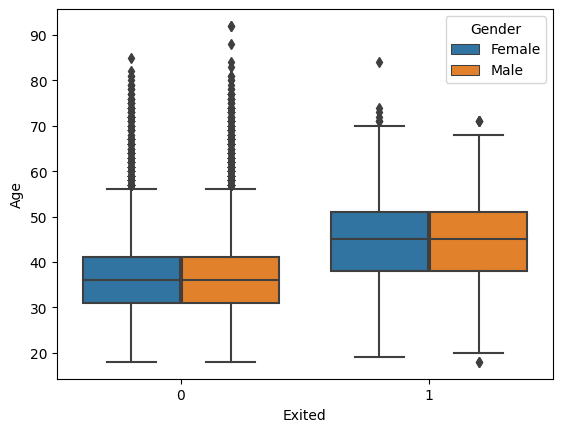

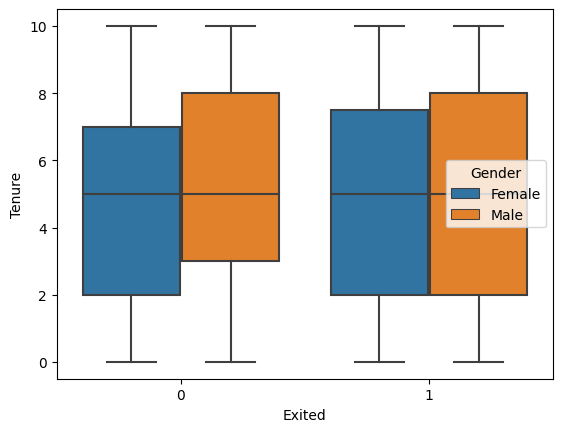

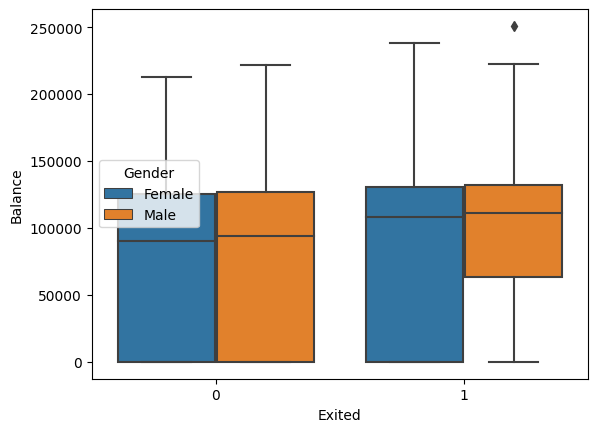

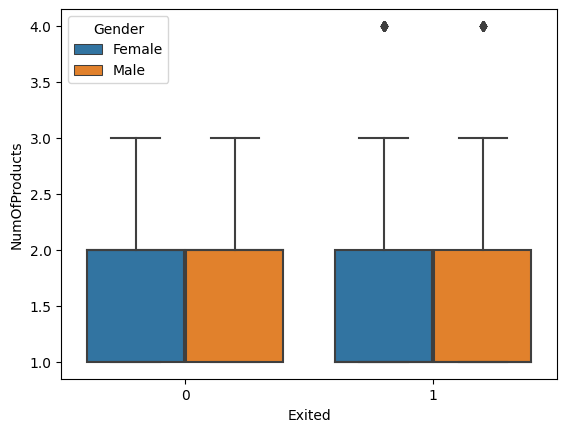

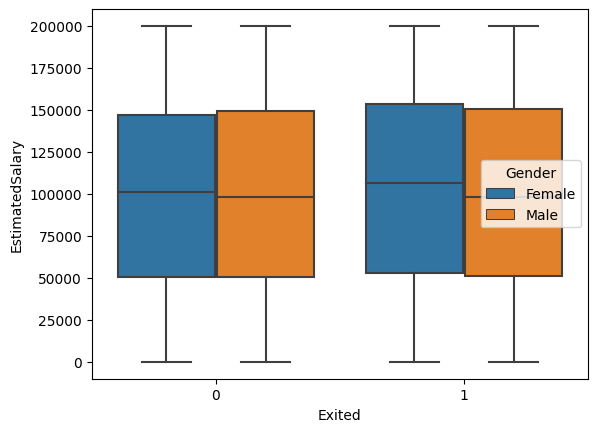

In [10]:
subset = subset.drop('Exited', axis=1)
for i in subset.columns:
  sns.boxplot(x=df['Exited'], y=df[i], hue=df['Gender'])
  plt.show()

## Insights from Bivariate Plots


1. The Avg Credit Score seem to be almost the same for Active and Churned customers
2. Young People seem to stick to the bank compared to older people
3. The Average Bank Balance is high for Churned Customers
4. The churning rate is high with German Customers
5. The Churning rate is high among the Non-Active Members




### 4. Distinguish the Target and Feature Set and divide the dataset into Training and Test sets

In [11]:
X=df.drop('Exited',axis=1)
y=df.pop('Exited')


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)
print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))



X_train size is 8100
X_val size is 900
X_test size is 1000


In [13]:
## Standardising the train, Val and Test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
num_subset=scaler.fit_transform(X_train[num_cols])
X_train_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_train_num_df['Geography']=list(X_train['Geography'])
X_train_num_df['Gender']=list(X_train['Gender'])
X_train_num_df['HasCrCard']=list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember']=list(X_train['IsActiveMember'])
X_train_num_df.head()
## Standardise the Validation data
num_subset=scaler.fit_transform(X_val[num_cols])
X_val_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_val_num_df['Geography']=list(X_val['Geography'])
X_val_num_df['Gender']=list(X_val['Gender'])
X_val_num_df['HasCrCard']=list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember']=list(X_val['IsActiveMember'])
## Standardise the Test data
num_subset=scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_test_num_df['Geography']=list(X_test['Geography'])
X_test_num_df['Gender']=list(X_test['Gender'])
X_test_num_df['HasCrCard']=list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember']=list(X_test['IsActiveMember'])



In [14]:
## Convert the categorical features to numerical
X_train_num_df=pd.get_dummies(X_train_num_df,columns=['Geography','Gender'])
X_test_num_df=pd.get_dummies(X_test_num_df,columns=['Geography','Gender'])
X_val_num_df=pd.get_dummies(X_val_num_df,columns=['Geography','Gender'])
X_train_num_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.178587,-1.041960,-1.732257,0.198686,0.820905,1.560315,1,1,1,0,0,0,1
1,-0.380169,-1.326982,1.730718,-0.022020,-0.907991,-0.713592,1,0,0,0,1,1,0
2,-0.349062,1.808258,-0.693364,0.681178,0.820905,-1.126515,1,0,0,1,0,1,0
3,0.625629,2.378302,-0.347067,-1.229191,0.820905,-1.682740,1,1,1,0,0,0,1
4,-0.203895,-1.136967,1.730718,0.924256,-0.907991,1.332535,1,1,0,0,1,0,1


### Initialise and build the Model

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [17]:
model.fit(X_train_num_df,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3977 - accuracy: 0.8241
Epoch 2/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3599 - accuracy: 0.8552
Epoch 3/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3529 - accuracy: 0.8559
Epoch 4/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3527 - accuracy: 0.8559
Epoch 5/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3455 - accuracy: 0.8610
Epoch 6/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8577
Epoch 7/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.8590
Epoch 8/100
810/810 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8614
Epoch 9/100
810/810 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8596
Epoch 10/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3433 - accura

## Predict the Results using 0.5 threshold


In [18]:
y_pred_val=model.predict(X_val_num_df)
y_pred_val[y_pred_val>0.5]=1
y_pred_val[y_pred_val <0.5]=0

29/29 [==============================] - 0s 3ms/step


In [19]:
y_pred_val=y_pred_val.tolist()
X_compare_val=X_val.copy()
X_compare_val['y_actual']=y_val
X_compare_val['y_pred']=y_pred_val
X_compare_val.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y_actual,y_pred
340,642,Germany,Female,40,6,129502.49,2,0,1,86099.23,1,[0.0]
8622,706,Germany,Male,36,9,58571.18,2,1,0,40774.01,0,[0.0]
8401,535,Spain,Male,58,1,0.00,2,1,1,11779.98,1,[0.0]
4338,714,Spain,Male,25,2,0.00,1,1,1,132979.43,0,[0.0]
8915,606,France,Male,36,1,155655.46,1,1,1,192387.51,1,[0.0]
2624,605,Spain,Female,29,3,116805.82,1,0,0,4092.75,0,[0.0]
2234,720,France,Female,38,10,0.00,2,1,1,56229.72,1,[0.0]
349,582,France,Male,39,5,0.00,2,1,1,129892.93,0,[0.0]
3719,850,France,Female,62,1,124678.35,1,1,0,70916.00,1,[1.0]
2171,526,Germany,Male,58,9,190298.89,2,1,1,191263.76,0,[0.0]


## Confusion Matrix of the Validation set

In [20]:
from sklearn.metrics import confusion_matrix
cm_val=confusion_matrix(y_val,y_pred_val)
cm_val

array([[689,  27],
       [101,  83]])

In [26]:
# Extract TP, TN, FP, FN from the confusion matrix
TP = cm_val[1, 1]  # True Positives
TN = cm_val[0, 0]  # True Negatives
FP = cm_val[0, 1]  # False Positives
FN = cm_val[1, 0]  # False Negatives

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Accuracy:", accuracy)

Accuracy: 0.8577777777777778


In [22]:
loss1,accuracy1=model.evaluate(X_train_num_df,y_train,verbose=False)
loss2,accuracy2=model.evaluate(X_val_num_df,y_val,verbose=False)
print("Train Loss {}".format(loss1))
print("Train Accuracy {}".format(accuracy1))
print("Val Loss {}".format(loss2))
print("Val Accuracy {}".format(accuracy2))

Train Loss 0.32568806409835815
Train Accuracy 0.8662962913513184
Val Loss 0.35947299003601074
Val Accuracy 0.8577777743339539


### Since our Training Accuracy and Validation Accuracy are pretty close, we can conclude that our model generalises well. So, lets apply the model on the Test set and make predictions and evaluate the model against the Test.

In [23]:
from sklearn import metrics
y_pred_test=model.predict(X_test_num_df)
y_pred_test[y_pred_test>0.5]=1
y_pred_test[y_pred_test <0.5]=0
cm_test=metrics.confusion_matrix(y_test,y_pred_test)
cm_test
print("Test Confusion Matrix")

32/32 [==============================] - 0s 2ms/step
Test Confusion Matrix


In [24]:
cm_test

array([[755,  39],
       [119,  87]])

In [25]:
loss3,accuracy3=model.evaluate(X_test_num_df,y_test,verbose=False)
print("Test Accuracy is {}".format(accuracy3))
print("Test loss is {}".format(loss3))

Test Accuracy is 0.8420000076293945
Test loss is 0.3749040365219116
